In [ ]:
#01 Umbralizacion

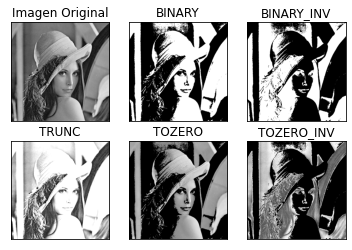

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
img = cv2.imread('images/lena.jpg',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
 
titles = ['Imagen Original','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
miArray = np.arange(6)
for i in miArray:
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
 
plt.show()

In [ ]:
#02 Umbralizacion adaptativa

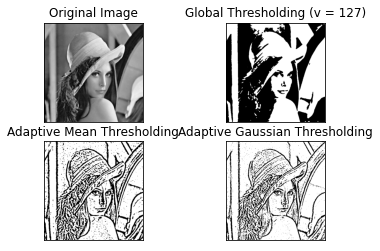

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
img = cv2.imread('images/lena.jpg',0)
img = cv2.medianBlur(img,5)
 
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
 
titles = ['Original Image', 'Global Thresholding (v = 127)',
          'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
miArray = np.arange(4)
for i in miArray:
 plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
#03 Binarizacion de OTSU

umbral otsu 2 84.0
umbral otsu 3 92.0


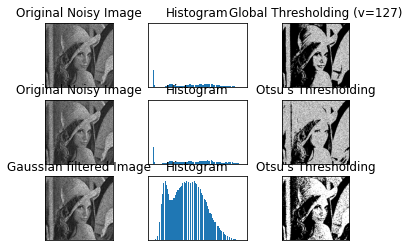

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
img = cv2.imread('images/lena_ruido.jpg',0)
 
# umbral global
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
 
# umbral de Otsu
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print("umbral otsu 2", ret2)
# umbral de Otsu después del filtro Gaussiano
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print("umbral otsu 3",ret3)
# plotear las imagenes y sus histogramas
images = [img, 0, th1, img, 0, th2, blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
'Original Noisy Image','Histogram',"Otsu's Thresholding",
'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
miArray = np.arange(3)
for i in miArray:
  plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
  plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
  plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),255)
  plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
  plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
  plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
#04 Erosion

In [1]:

import cv2
import numpy as np
#--leer la imagen
img = cv2.imread('images/A.png',0)
#--elemento estructurante
kernel1 = np.ones((7,7),np.uint8)
kernel2= cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))
kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
kernel4=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
#--realizar la erosion
erosion1 = cv2.erode(img,kernel1,iterations = 1)
erosion2= cv2.erode(img,kernel2,iterations = 1)
erosion3 = cv2.erode(img,kernel3,iterations = 1)
erosion4 = cv2.erode(img,kernel4,iterations = 1)
#--mostrar resultados
cv2.imshow("original", img)
#cv2.imshow("erosion_ones", erosion1)
#cv2.imshow("erosion_cruz", erosion2)
#cv2.imshow("erosion_rectangular", erosion3)
#cv2.imshow("erosion_elipse", erosion4)

blurred_2 = np.hstack([
  cv2.blur(erosion1,(1,1)),
  cv2.blur(erosion2,(1,1)),
  cv2.blur(erosion3,(1,1)),
  cv2.blur(erosion4,(1,1))])  
cv2.imshow("ones,cruz,rectangular,elipse",blurred_2)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
#05 Dilatacion

In [2]:

import cv2
import numpy as np
#--leer la imagen
img = cv2.imread('images/A.png',0)
#--elemento estructurante
kernel1 = np.ones((7,7),np.uint8)
kernel2 = cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))
kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
kernel4=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

dilatacion1 = cv2.dilate(img,kernel1,iterations = 1)
dilatacion2 = cv2.dilate(img,kernel2,iterations = 1)
dilatacion3 = cv2.dilate(img,kernel3,iterations = 1)
dilatacion4 = cv2.dilate(img,kernel4,iterations = 1)

#--mostrar resultados
cv2.imshow("original", img)
#cv2.imshow("dilatcion", dilatacion)

blurred_2 = np.hstack([
  cv2.blur(dilatacion1,(1,1)),
  cv2.blur(dilatacion2,(1,1)),
  cv2.blur(dilatacion3,(1,1)),
  cv2.blur(dilatacion4,(1,1))])  
cv2.imshow("ones,cruz,rectangular,elipse",blurred_2)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
#06 Apertura

In [10]:

import cv2
import numpy as np
#--leer la imagen
img = cv2.imread('images/A_noise1.png',0)
#--elemento estructurante
kernel1 = np.ones((7,7),np.uint8)
kernel2 = cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))
kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
kernel4=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
#--realizar la apertura
apertura1 = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel1)
apertura2 = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel2)
apertura3 = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel3)
apertura4 = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel4)

#--mostrar resultados
cv2.imshow("original", img)
#cv2.imshow("apertura", apertura)
blurred_2 = np.hstack([
  cv2.blur(apertura1,(1,1)),
  cv2.blur(apertura2,(1,1)),
  cv2.blur(apertura3,(1,1)),
  cv2.blur(apertura4,(1,1))])  
cv2.imshow("ones,cruz,rectangular,elipse",blurred_2)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
#07 cierre

In [11]:

import cv2
import numpy as np
#--leer la imagen
img = cv2.imread('images/A_noise2.png',0)
#--elemento estructurante
kernel1 = np.ones((7,7),np.uint8)
kernel2 = cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))
kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
kernel4=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
#--realizar el cierre
cierre1 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel1)
cierre2 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel2)
cierre3 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel3)
cierre4 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel4)
#--mostrar resultados
cv2.imshow("original", img)
#cv2.imshow("cierre", cierre)
blurred_2 = np.hstack([
  cv2.blur(cierre1,(1,1)),
  cv2.blur(cierre2,(1,1)),
  cv2.blur(cierre3,(1,1)),
  cv2.blur(cierre4,(1,1))])  
cv2.imshow("ones,cruz,rectangular,elipse",blurred_2)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
#08

In [12]:

import cv2
import numpy as np
#--leer la imagen
img = cv2.imread('images/A.png',0)
#--elemento estructurante
kernel1 = np.ones((7,7),np.uint8)
kernel2 = cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))
kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
kernel4=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
#--realizar el grqdiente
gradiente1 = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel1)
gradiente2 = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel2)
gradiente3 = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel3)
gradiente4 = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel4)
#--mostrar resultados
cv2.imshow("original", img)
#cv2.imshow("gradiente", gradiente)
blurred_2 = np.hstack([
  cv2.blur(gradiente1,(1,1)),
  cv2.blur(gradiente2,(1,1)),
  cv2.blur(gradiente3,(1,1)),
  cv2.blur(gradiente4,(1,1))])  
cv2.imshow("ones,cruz,rectangular,elipse",blurred_2)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
#Tarea

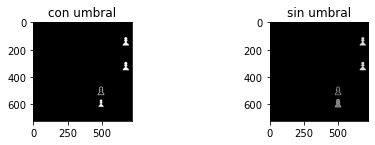

In [42]:
#Tarea N° 6
#Alumno: Aucapiña Suvizarreta Edwar
#Codigo: 113572

import cv2
import numpy as np
import matplotlib.pyplot as plt
img1 = cv2.imread("../images/board11.jpg")
img2 = cv2.imread("../images/board22.jpg")

# Convertimos las imagenes a escala de grises
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# umbral global
ret1,th1 = cv2.threshold(img1, 200, 255, cv2.THRESH_BINARY)
ret2,th2 = cv2.threshold(img2, 200, 255, cv2.THRESH_BINARY)

# Se usa la funcion xor entre las 2 matrices
xor1 = cv2.bitwise_xor(th1,th2)
xor2 = cv2.bitwise_xor(img1,img2)

plt.subplot(2,3,1),plt.imshow(xor1,'gray')
plt.title("con umbral")
plt.subplot(2,3,3),plt.imshow(xor2,'gray')
plt.title("sin umbral")

plt.show()